A cellular automaton consists of a grid of cells; each cell has a state — either alive or dead. I will refer to this grid as the universe, 

Firstly, let us define the the eight grid squares around a cell as its neighbours. The rules of Life are then as follows:

    1. A living cell will survive into the next generation by default, unless:

        it has fewer than two live neighbours (underpopulation).
        it has more than three live neighbours (overpopulation).

    2. A dead cell will spring to life if it has exactly three live neighbours (reproduction).

Clearly, no cells can come to life unless there are already some living cells in the universe. Thus, we have to provide the universe with a seed, i.e a set of initial living cells. The massive variety and complexity of the results, often starting from simple seeds, is what makes cellular automata so interesting.

In [1]:
# Import libaries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

This is a rough overview of our plan of attack:

    1. Initialise an empty universe
    2. Set the seed in the universe
    3. Determine if a given cell survives to the next iteration, based on its neighbours
    4. Iterate this survival function over all the cells in the universe
    5. Iterate steps 3–4 for the desired number of generations
    
Let us start with a small universe consisting of a six-by-six grid. In our universe, each cell will either be a 1 (alive) or 0 (dead). For now, they are all dead, so we initialise with np.zeros

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


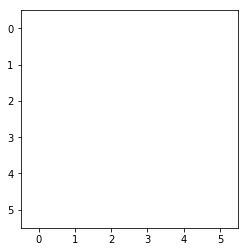

In [2]:
# Initialise the universe
universe =  np.zeros((6,6))
print(universe)

plt.imshow(universe, cmap='binary')
plt.show()

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


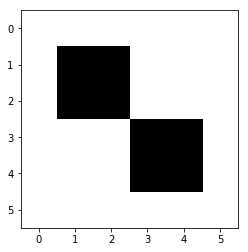

In [7]:
# Initialise the seed
seed_array = np.array([[1,1,0,0],
                      [1,1,0,0],
                      [0,0,1,1],
                      [0,0,1,1]])
x_start, y_start = 1,1
x_end, y_end = x_start + seed_array.shape[0], y_start + seed_array.shape[1]

universe[x_start:x_end, y_start:y_end] = seed_array

print(universe)
plt.imshow(universe, cmap='binary')
plt.show()

In [6]:
def survival(x, y, universe):
    """
    Compute one iteration of Life for one cell.
    :param x: x coordinate of cell in the universe
    :type x: int
    :param y: y coordinate of cell in the universe
    :type y: int
    :param universe: the universe of cells
    :type universe: np.ndarray
    """
    # Count number of neighbours
    num_neighbours = np.sum(universe[x - 1 : x + 2, y - 1 : y + 2]) - universe[x,y]
    # The rules of Life
    if universe[x,y] and not 2 <= num_neighbours <= 3 :
        return 0
    elif num_neighbours == 3:
        return 1
    else:
        return universe[x,y]
    

In [7]:
def generation(universe):
    """
    Compute one iteration of Life for the universe.
    :param universe: initial universe of cells
    :type universe: np.ndarray
    :return: updated universe of cells
    :rtype: np.ndarray
    """
    new_universe = np.copy(universe)
    # Apply the survival function to every cell in the universe
    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            new_universe[i,j] = survival(i, j, universe)
    
    
    return new_universe

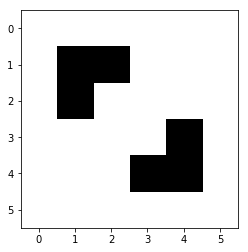

In [20]:
universe = generation(universe)
plt.imshow(universe, cmap='binary')
plt.show()

MovieWriter imagemagick unavailable. Trying to use pillow instead.


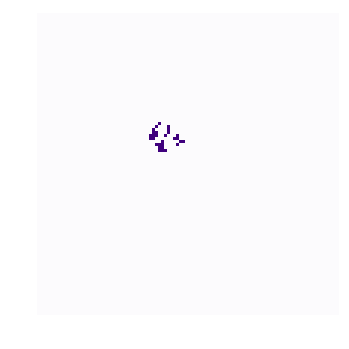

In [8]:
# For Animation
fig = plt.figure(dpi=100) # image quality in DPI
plt.axis("off")
# number of universe iterations
n_generations = 50
ims = []
for i in range(n_generations):
    ims.append((plt.imshow(universe, cmap="Purples"),))
    universe = generation(universe)
# interval (in milliseconds) between iterations
im_ani = animation.ArtistAnimation(fig, ims, interval=300, repeat_delay=3000, blit=True)
im_ani.save("hello.gif", writer="imagemagick")

In [9]:
# Different Seeds
seeds = {
    "diehard": [
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 1],
    ],
    "boat": [[1, 1, 0], [1, 0, 1], [0, 1, 0]],
    "r_pentomino": [[0, 1, 1], [1, 1, 0], [0, 1, 0]],
    "pentadecathlon": [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
    ],
    "beacon": [[1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1]],
    "acorn": [[0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 1, 1]],
    "spaceship": [[0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 0, 0]],
    "block_switch_engine": [
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0],
    ],
    "infinite": [
        [1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [1, 0, 1, 0, 1],
    ],
}

In [10]:
for key, value in seeds.items(): 
         print(key)
         print(value)

diehard
[[0, 0, 0, 0, 0, 0, 1, 0], [1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 1, 1]]
boat
[[1, 1, 0], [1, 0, 1], [0, 1, 0]]
r_pentomino
[[0, 1, 1], [1, 1, 0], [0, 1, 0]]
pentadecathlon
[[1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1]]
beacon
[[1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1]]
acorn
[[0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 1, 1]]
spaceship
[[0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 0, 0]]
block_switch_engine
[[0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0]]
infinite
[[1, 1, 1, 0, 1], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [0, 1, 1, 0, 1], [1, 0, 1, 0, 1]]


Run the Simulation for different seeds and Save the GIF file. Name according to the seed name.

In [11]:
universe =  np.zeros((100,100))
print(universe)
x_start, y_start = 40,40


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
for key, value in seeds.items(): 
    seed_array = np.array(value)
    x_end, y_end = x_start + seed_array.shape[0], y_start + seed_array.shape[1]
    universe[x_start:x_end, y_start:y_end] = seed_array

    universe = generation(universe)
    fig = plt.figure(dpi=100) # image quality in DPI
    plt.axis("off")
    n_generations = 50
    ims = []
    for i in range(n_generations):
        ims.append((plt.imshow(universe, cmap="Purples"),))
        universe = generation(universe)
    im_ani = animation.ArtistAnimation(fig, ims, interval=300, repeat_delay=3000, blit=True)
    
    im_ani.save(key+".gif", writer="imagemagick")
        
        
    
    

MovieWriter imagemagick unavailable. Trying to use pillow instead.


In [1]:
# Different Seeds
seeds = {
    "diehard": [
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 1],
    ],
    "boat": [[1, 1, 0], [1, 0, 1], [0, 1, 0]],
    "r_pentomino": [[0, 1, 1], [1, 1, 0], [0, 1, 0]],
    "pentadecathlon": [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
    ],
    "beacon": [[1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1]],
    "acorn": [[0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 1, 1]],
    "spaceship": [[0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 0, 0]],
    "block_switch_engine": [
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0],
    ],
    "infinite": [
        [1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [1, 0, 1, 0, 1],
    ],
    "new1" : [[0,1,0],[0,0,1], [1,1,1]],
    "glider_gun": [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],
}

In [2]:
# Import libaries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def survival(x, y, universe):
    """
    Compute one iteration of Life for one cell.
    :param x: x coordinate of cell in the universe
    :type x: int
    :param y: y coordinate of cell in the universe
    :type y: int
    :param universe: the universe of cells
    :type universe: np.ndarray
    """
    # Count number of neighbours
    num_neighbours = np.sum(universe[x - 1 : x + 2, y - 1 : y + 2]) - universe[x,y]
    # The rules of Life
    if universe[x,y] and not 2 <= num_neighbours <= 3 :
        return 0
    elif num_neighbours == 3:
        return 1
    else:
        return universe[x,y]

def generation(universe):
    """
    Compute one iteration of Life for the universe.
    :param universe: initial universe of cells
    :type universe: np.ndarray
    :return: updated universe of cells
    :rtype: np.ndarray
    """
    new_universe = np.copy(universe)
    # Apply the survival function to every cell in the universe
    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            new_universe[i,j] = survival(i, j, universe)
    
    
    return new_universe




for key, value in seeds.items(): 
    seed_array = np.array(value)
    
    universe =  np.zeros((100,100))
    x_start, y_start = 40,40
    
    x_end, y_end = x_start + seed_array.shape[0], y_start + seed_array.shape[1]
    universe[x_start:x_end, y_start:y_end] = seed_array
    
    universe = generation(universe)
    fig = plt.figure(dpi=100) # image quality in DPI
    plt.axis("off")
    n_generations = 50
    ims = []
    for i in range(n_generations):
        ims.append((plt.imshow(universe, cmap="Purples"),))
        universe = generation(universe)
    im_ani = animation.ArtistAnimation(fig, ims, interval=300, repeat_delay=3000, blit=True)
    
    im_ani.save(key+".gif", writer="imagemagick")
        

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
MovieWriter imagemagick unavailable; trying to use <class 'matpl